In [47]:
import importlib
import utils
importlib.reload(utils)
from utils import *

In [94]:
files = {
    "agen": "Meteo_Perif_Toulouse_Contemporain/Agen/Simulation_Outputs",
    "albi": "Meteo_Perif_Toulouse_Contemporain/Albi/Simulation_Outputs",
    "auch": "Meteo_Perif_Toulouse_Contemporain/Auch/Simulation_Outputs",
    "toulouse": "Meteo_Perif_Toulouse_Contemporain/Toulouse/Simulation_Outputs",
    "Birmensdorf":"Meteo_Perif_Zurich_Contemporain/Birmensdorf/Simulation_Outputs",
    "Taenikon":"Meteo_Perif_Zurich_Contemporain/Taenikon/Simulation_Outputs",
    "Zurich_fluntern":"Meteo_Perif_Zurich_Contemporain/Zuerich_Fluntern/Simulation_Outputs",
    "Zurich_kloten":"Meteo_Perif_Zurich_Contemporain/Zuerich_kloten/Simulation_Outputs"
}

files2 = {
    "Cordoba": "Meteo_Perif_Seville_Contemporain/Cordoba/Simulation_Outputs",
    "Granada": "Meteo_Perif_Seville_Contemporain/Granada/Simulation_Outputs",
    "Malaga": "Meteo_Perif_Seville_Contemporain/Malaga/Simulation_Outputs",
    "Sevilla": "Meteo_Perif_Seville_Contemporain/Sevilla/Simulation_Outputs"   
}

In [96]:
for city, path in files.items():
      globals()[f"consommation_heat_{city}"] = extract_consumption(files[city])

for city2, path2 in files2.items():
      globals()[f"consommation_cool_{city2}"] = extract_consumption(files2[city2],5)    

In [97]:
print(consommation_cool_Cordoba.shape)


(365, 24)


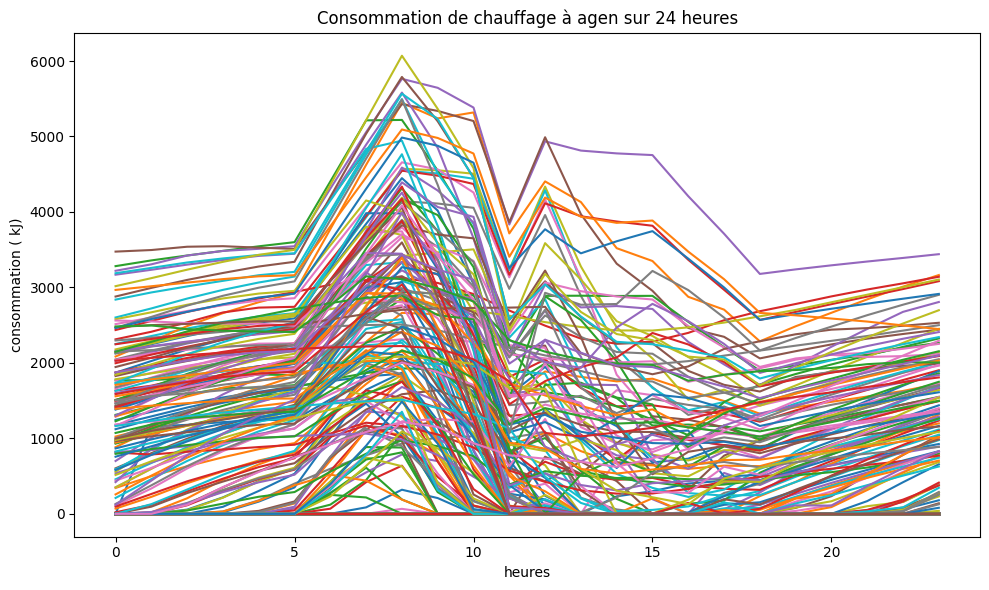

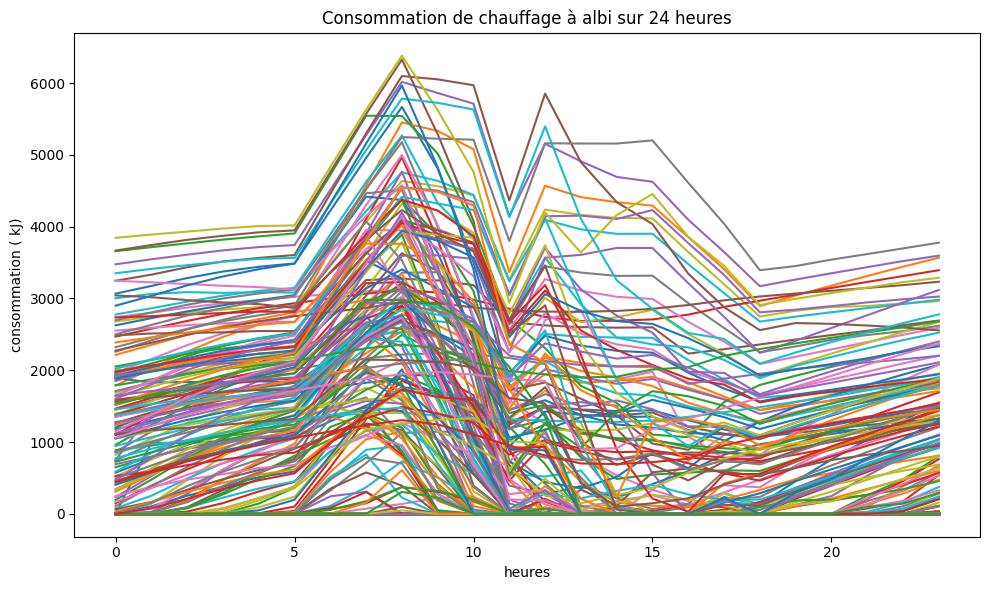

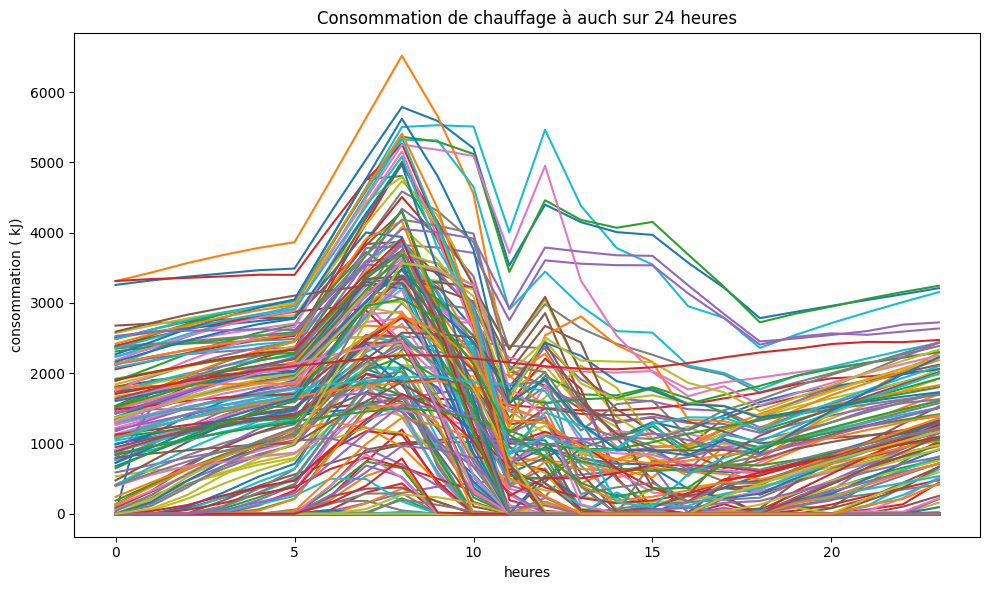

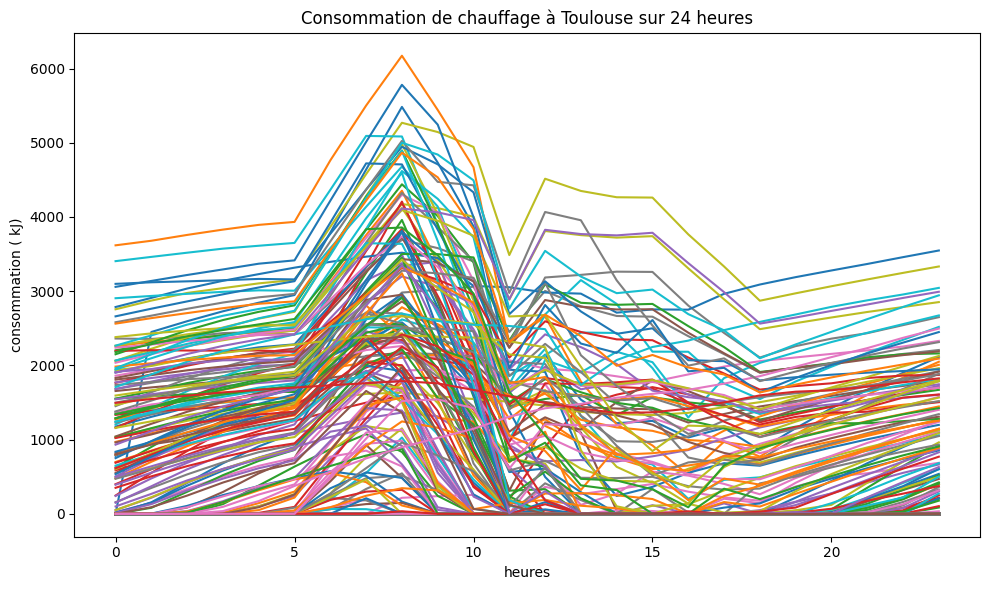

In [75]:
draw(consommation_agen, "Consommation de chauffage à agen sur 24 heures","heures","consommation ( kJ)")
draw(consommation_albi, "Consommation de chauffage à albi sur 24 heures","heures","consommation ( kJ)")
draw(consommation_auch, "Consommation de chauffage à auch sur 24 heures","heures","consommation ( kJ)")
draw(consommation_toulouse, "Consommation de chauffage à Toulouse sur 24 heures","heures","consommation ( kJ)")

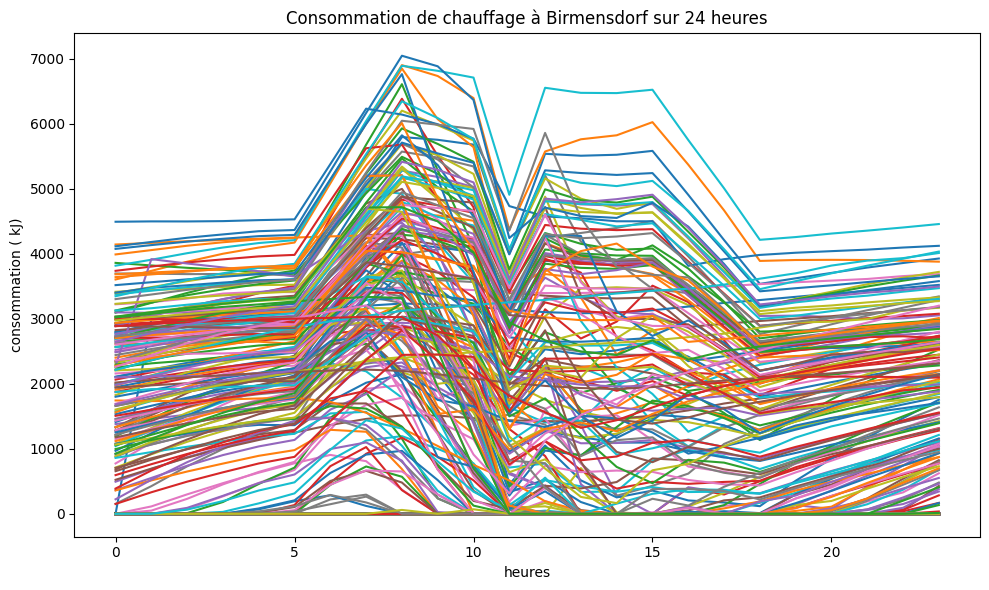

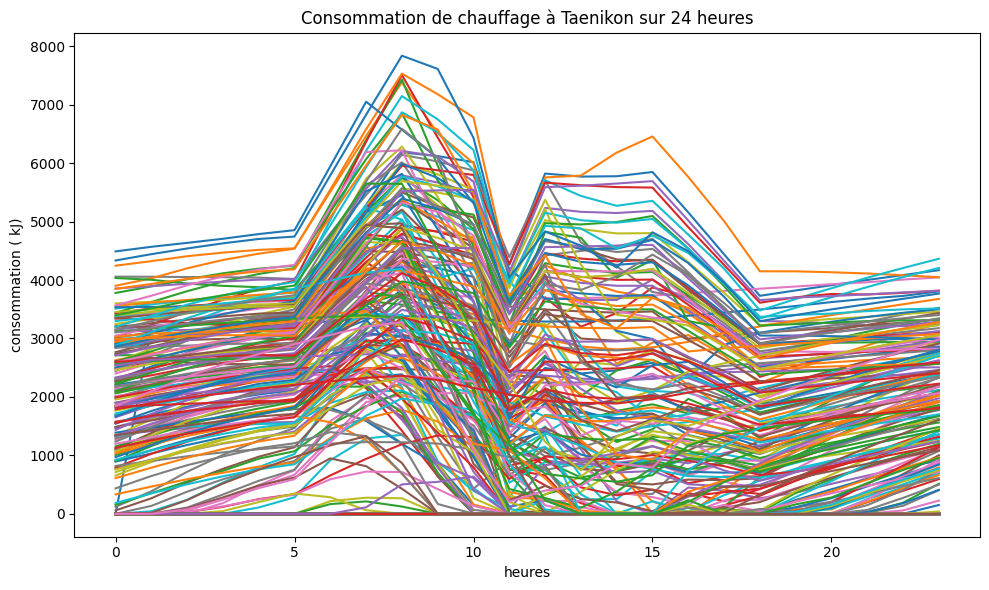

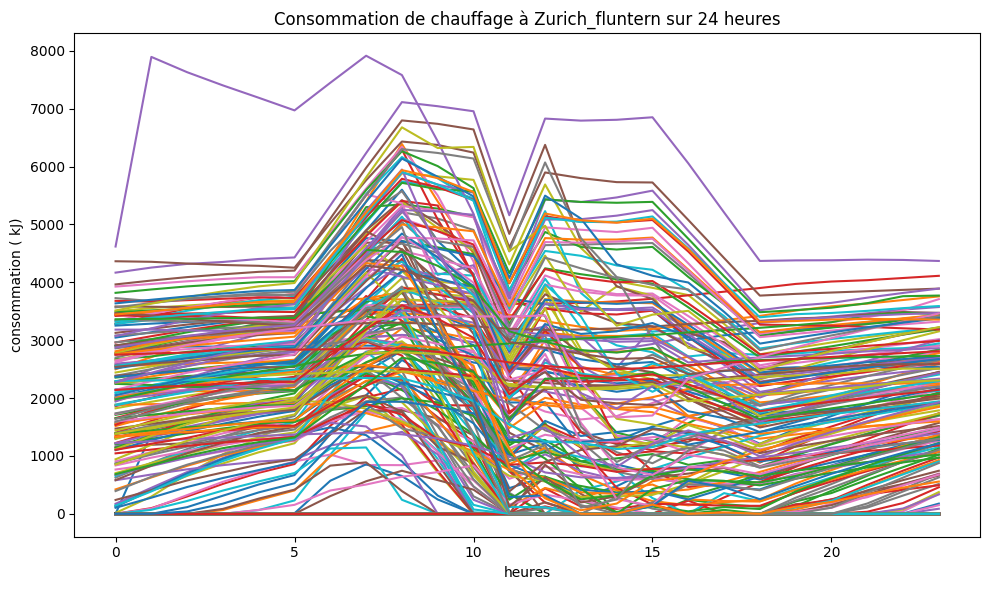

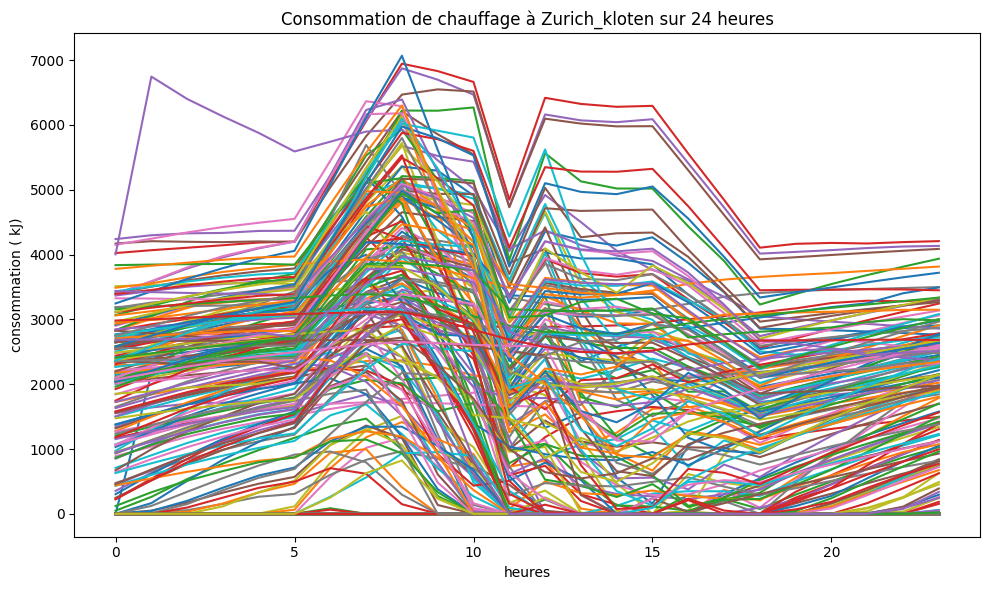

In [76]:
draw(consommation_Birmensdorf, "Consommation de chauffage à Birmensdorf sur 24 heures","heures","consommation ( kJ)")
draw(consommation_Taenikon, "Consommation de chauffage à Taenikon sur 24 heures","heures","consommation ( kJ)")
draw(consommation_Zurich_fluntern, "Consommation de chauffage à Zurich_fluntern sur 24 heures","heures","consommation ( kJ)")
draw(consommation_Zurich_kloten, "Consommation de chauffage à Zurich_kloten sur 24 heures","heures","consommation ( kJ)")


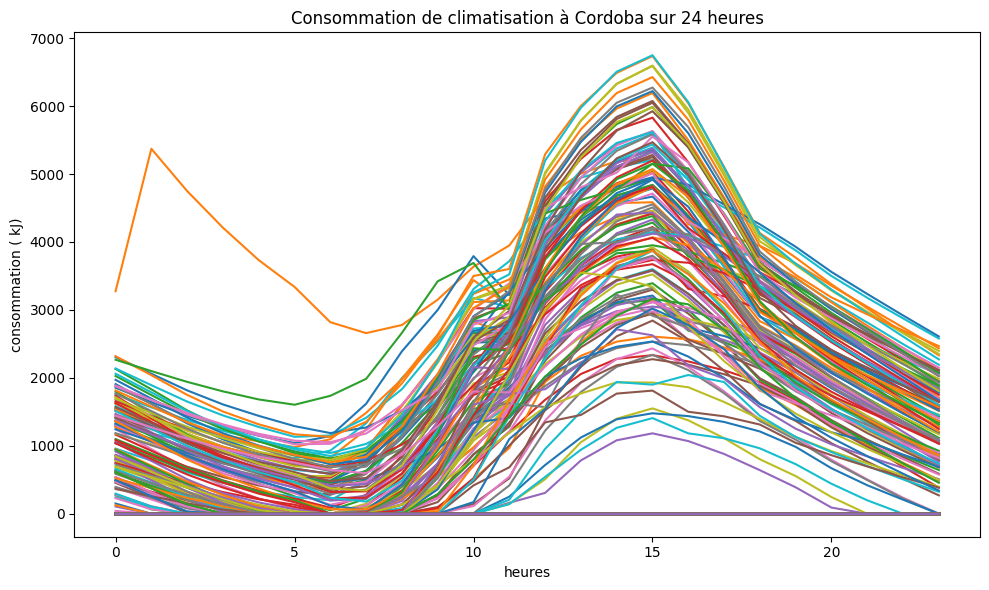

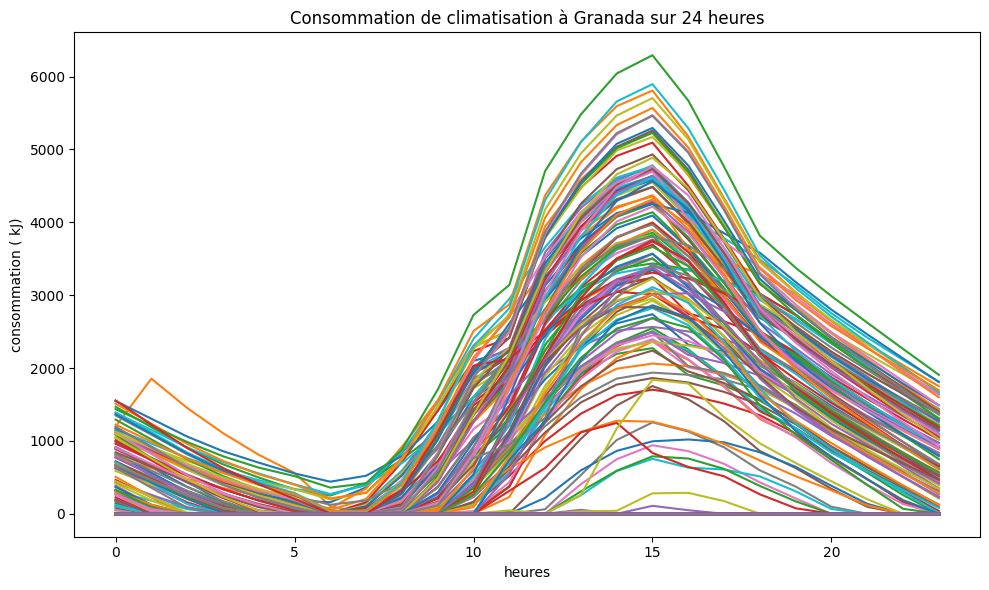

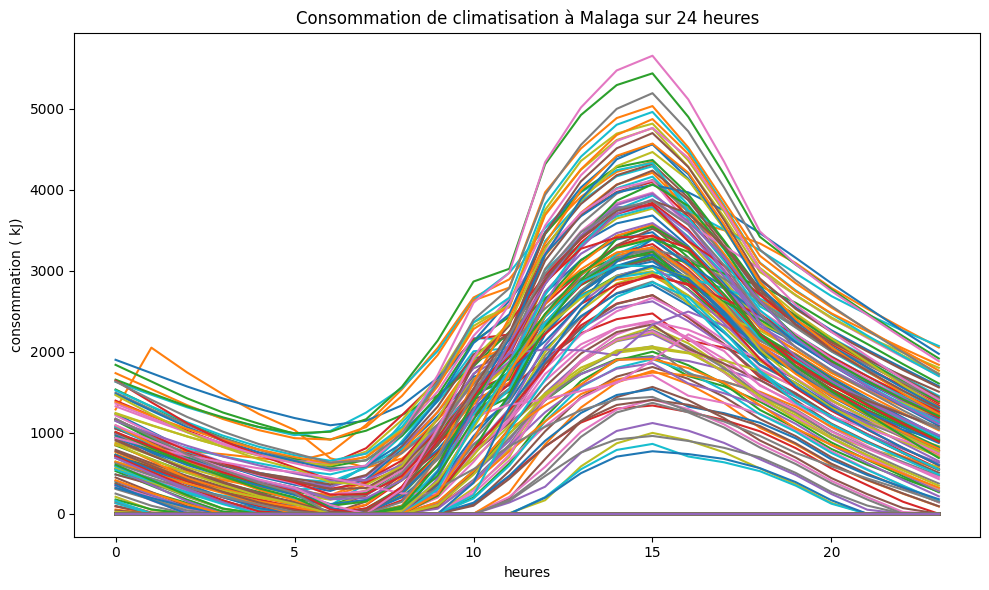

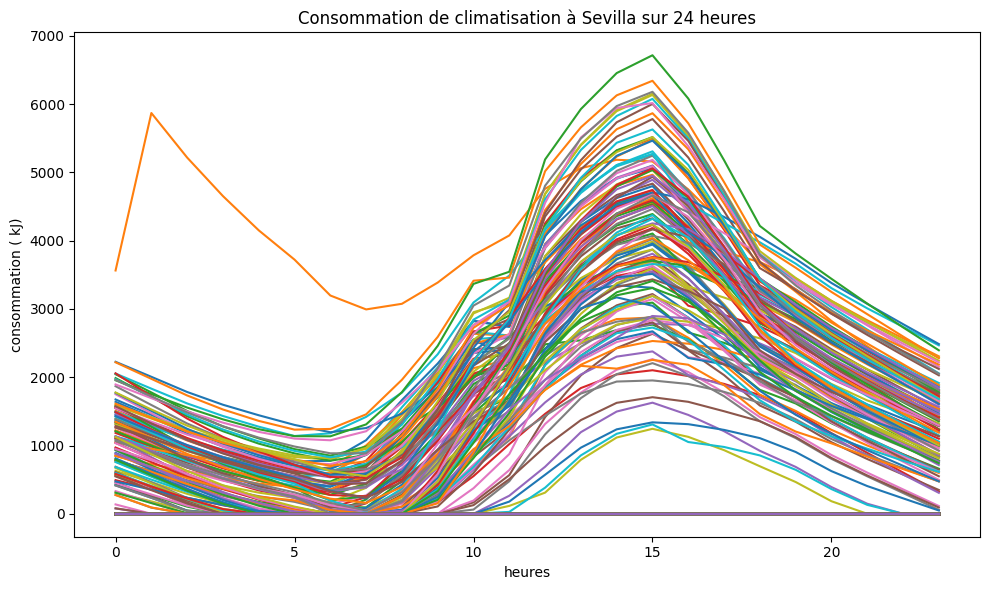

In [98]:
draw(consommation_cool_Cordoba, "Consommation de climatisation à Cordoba sur 24 heures","heures","consommation ( kJ)")
draw(consommation_cool_Granada, "Consommation de climatisation à Granada sur 24 heures","heures","consommation ( kJ)")
draw(consommation_cool_Malaga, "Consommation de climatisation à Malaga sur 24 heures","heures","consommation ( kJ)")
draw(consommation_cool_Sevilla, "Consommation de climatisation à Sevilla sur 24 heures","heures","consommation ( kJ)")

In [99]:
df_combined_tou = pd.concat([consommation_agen, consommation_albi,consommation_auch,consommation_toulouse], axis=0).reset_index(drop=True)
df_combined_zur = pd.concat([consommation_Birmensdorf, consommation_Taenikon,consommation_Zurich_fluntern,consommation_Zurich_kloten], axis=0).reset_index(drop=True)
df_combined_sev = pd.concat([consommation_cool_Cordoba, consommation_cool_Granada,consommation_cool_Malaga,consommation_cool_Sevilla], axis=0).reset_index(drop=True)


In [100]:
df_final_tou=add_binary_column(df_combined_tou, column_name="heat_on")
df_final_zur=add_binary_column(df_combined_zur, column_name="heat_on")
df_final_sev=add_binary_column(df_combined_sev, column_name="cool_on")

In [101]:
df_heat = df_final_tou[df_final_tou["heat_on"] == 1].drop(columns=["heat_on"])
model = apply_kmeans(n_clusters=3, data=df_heat)
df_final_tou.loc[df_final_tou["heat_on"] == 1, "clusters"] = model.labels_
df_final_tou.loc[df_final_tou["heat_on"] == 0, "clusters"] = 3

df_heat = df_final_zur[df_final_zur["heat_on"] == 1].drop(columns=["heat_on"])
model = apply_kmeans(n_clusters=3, data=df_heat)
df_final_zur.loc[df_final_zur["heat_on"] == 1, "clusters"] = model.labels_
df_final_zur.loc[df_final_zur["heat_on"] == 0, "clusters"] = 3

df_cool = df_final_sev[df_final_sev["cool_on"] == 1].drop(columns=["cool_on"])
model = apply_kmeans(n_clusters=3, data=df_cool)
df_final_sev.loc[df_final_sev["cool_on"] == 1, "clusters"] = model.labels_
df_final_sev.loc[df_final_sev["cool_on"] == 0, "clusters"] = 3

**********************3 clusters pour les jours où le chauffage est allumé et 1 cluster pour les jours d'été à Toulouse et ses périphéries ***************************


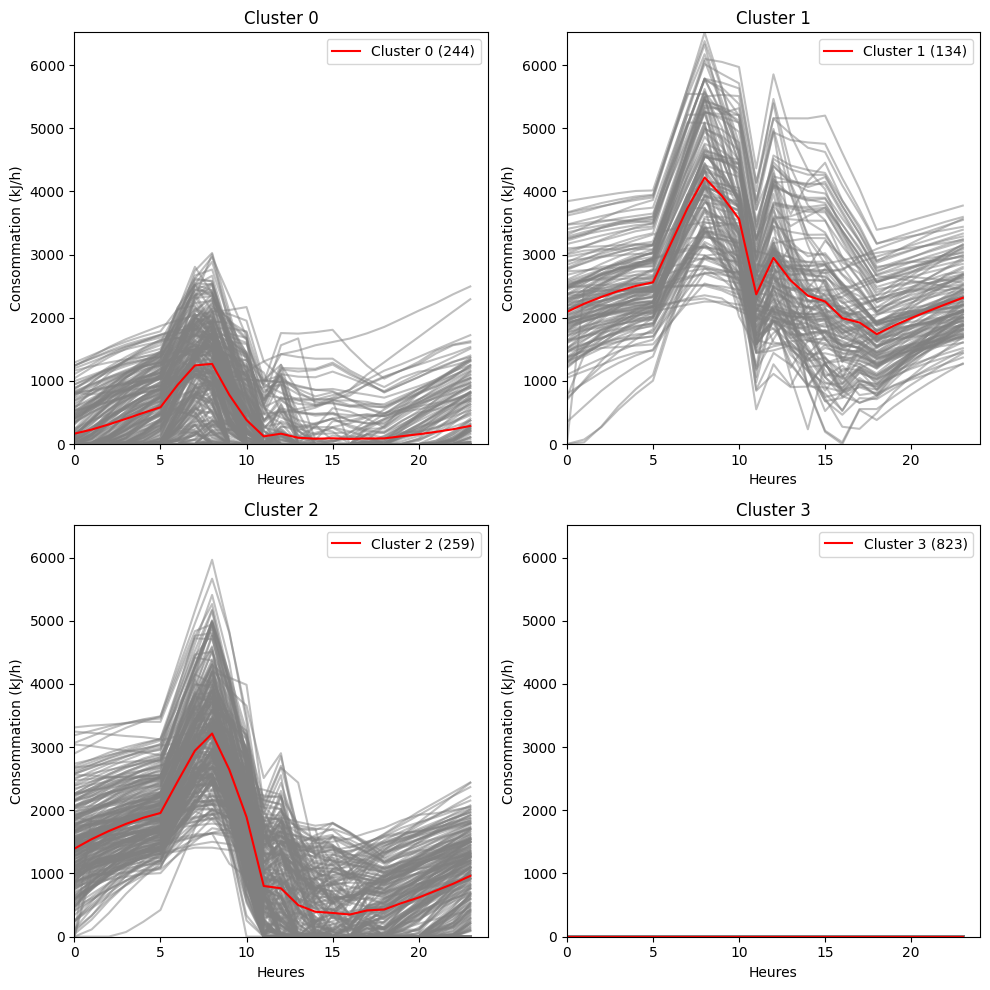

In [82]:
print("**********************3 clusters pour les jours où le chauffage est allumé et 1 cluster pour les jours d'été à Toulouse et ses périphéries ***************************")
plot_clusters(df_final_tou.drop(columns=["heat_on"]))

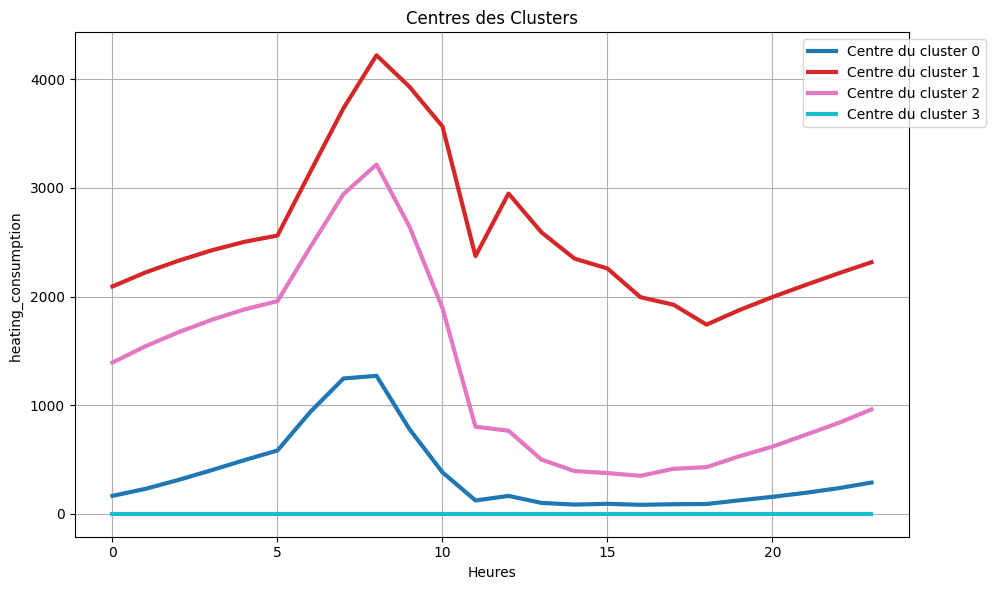

In [83]:
plot_cluster_centers_with_colors(df_final_tou.drop(columns=["heat_on"]), df_final_tou["clusters"], y_label="heating_consumption ")

In [84]:
evaluate_clustering_cooling(df_final_tou,"heat_on")

Davies-Bouldin Index: 0.9218321164573672
Silhouette Score: 0.6270163106098231


In [85]:
df_final_tou.to_csv("conso_heat_perif_toulouse",index=False)

**********************3 clusters pour les jours où le chauffage est allumé et 1 cluster pour les jours d'été à zurich et ses périphéries ***************************


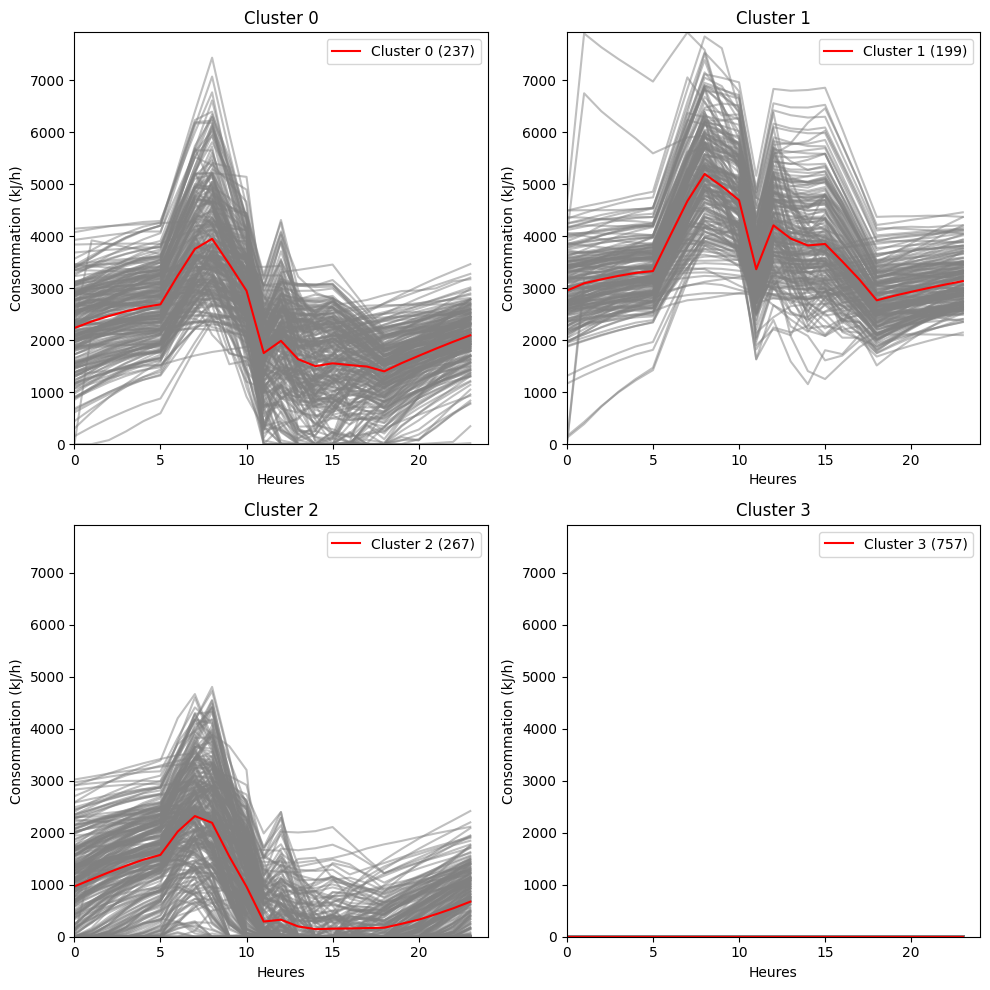

In [86]:
print("**********************3 clusters pour les jours où le chauffage est allumé et 1 cluster pour les jours d'été à zurich et ses périphéries ***************************")
plot_clusters(df_final_zur.drop(columns=["heat_on"]))

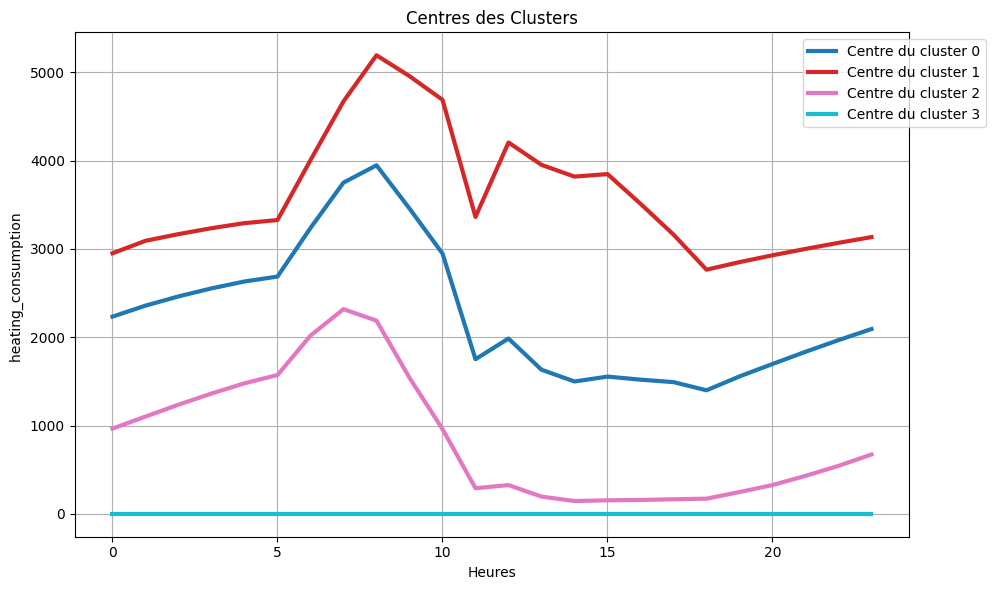

In [87]:
plot_cluster_centers_with_colors(df_final_zur.drop(columns=["heat_on"]), df_final_zur["clusters"], y_label="heating_consumption ")

In [88]:
evaluate_clustering_cooling(df_final_zur,"heat_on")

Davies-Bouldin Index: 0.8654392523449994
Silhouette Score: 0.6353605238032672


In [89]:
df_final_zur.to_csv("conso_heat_perif_zurich",index=False)

**********************3 clusters pour les jours où la climatisation  est allumé et 1 cluster pour les jours d'hiver à seville et ses périphéries ***************************


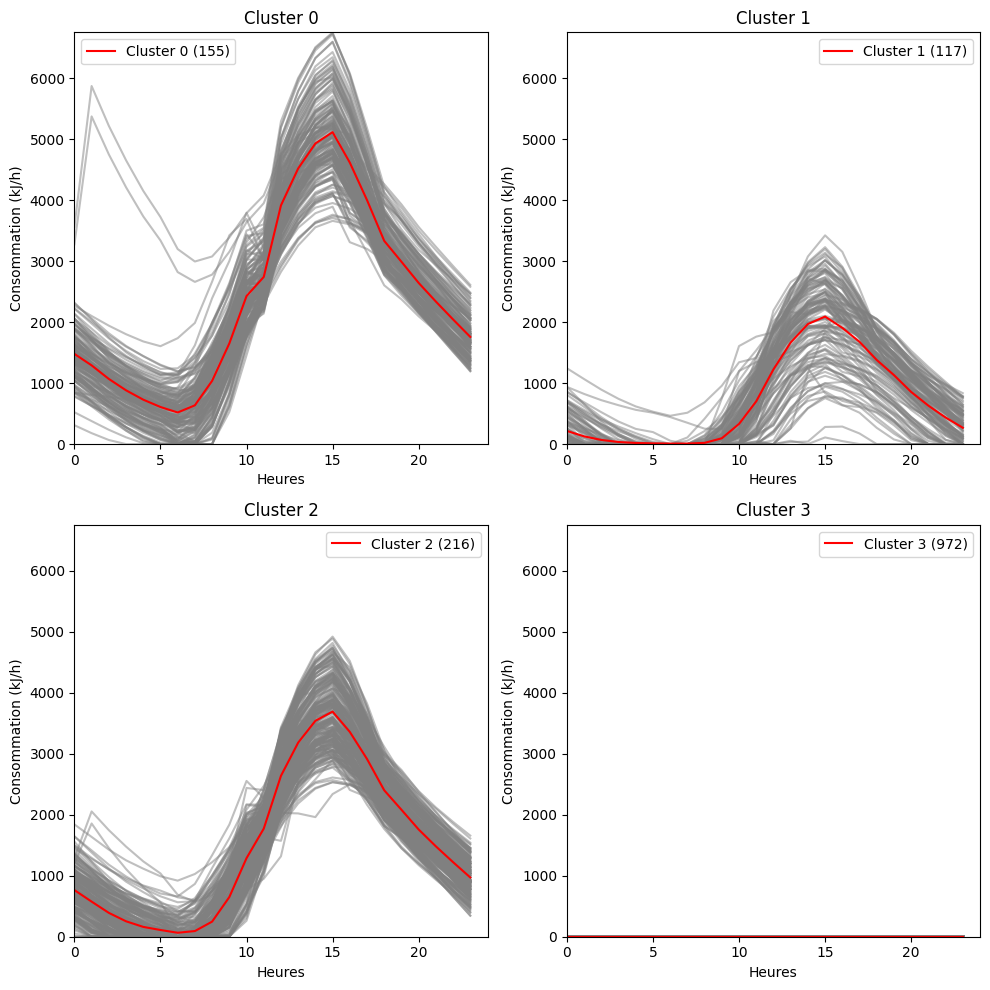

In [102]:
print("**********************3 clusters pour les jours où la climatisation  est allumé et 1 cluster pour les jours d'hiver à seville et ses périphéries ***************************")
plot_clusters(df_final_sev.drop(columns=["cool_on"]))

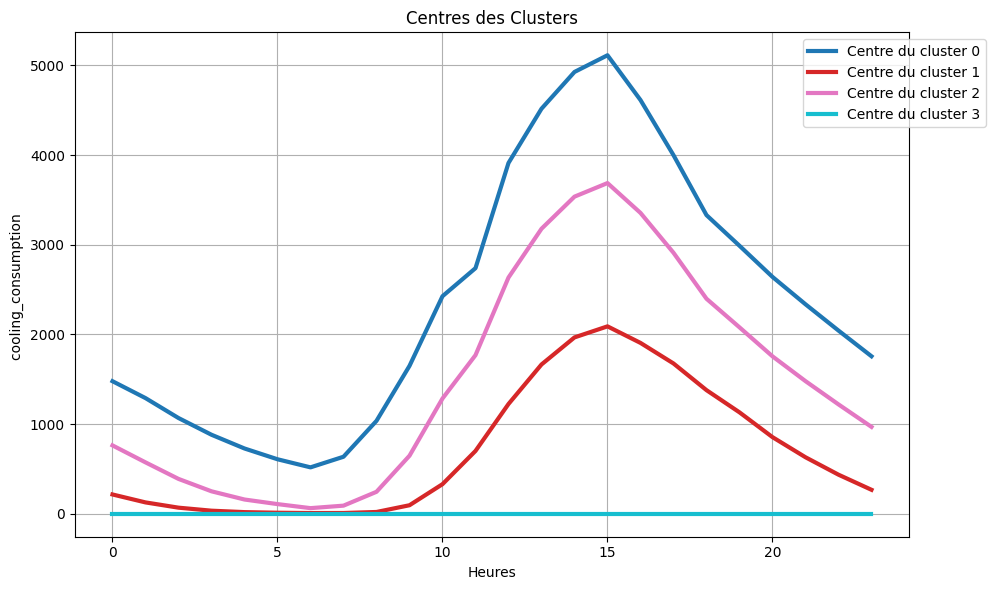

In [103]:
plot_cluster_centers_with_colors(df_final_sev.drop(columns=["cool_on"]), df_final_sev["clusters"], y_label="cooling_consumption ")

In [104]:
evaluate_clustering_cooling(df_final_sev,"cool_on")

Davies-Bouldin Index: 0.6578695814432312
Silhouette Score: 0.7901285696483455


In [105]:
df_final_sev.to_csv("conso_cool_perif_seville",index=False)